# Sales-classification-for-a-cloth-manufacturing-company-using-Random-Forest/Company data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from matplotlib.gridspec import GridSpec
from scipy.special import boxcox1p

In [4]:
warnings.filterwarnings("ignore")

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [9]:
company_data=pd.read_csv("Company_Data (1).csv")

In [10]:
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [11]:
company_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
numerical_feature = company_data.describe(include=["int64", "float64"]).columns

print(list(numerical_feature))

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [13]:
categorical_feature = company_data.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


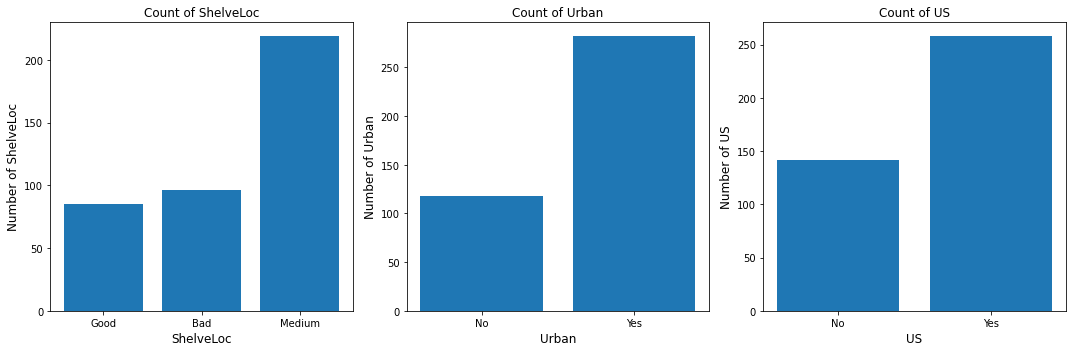

In [14]:
print(categorical_feature)


plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = company_data.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

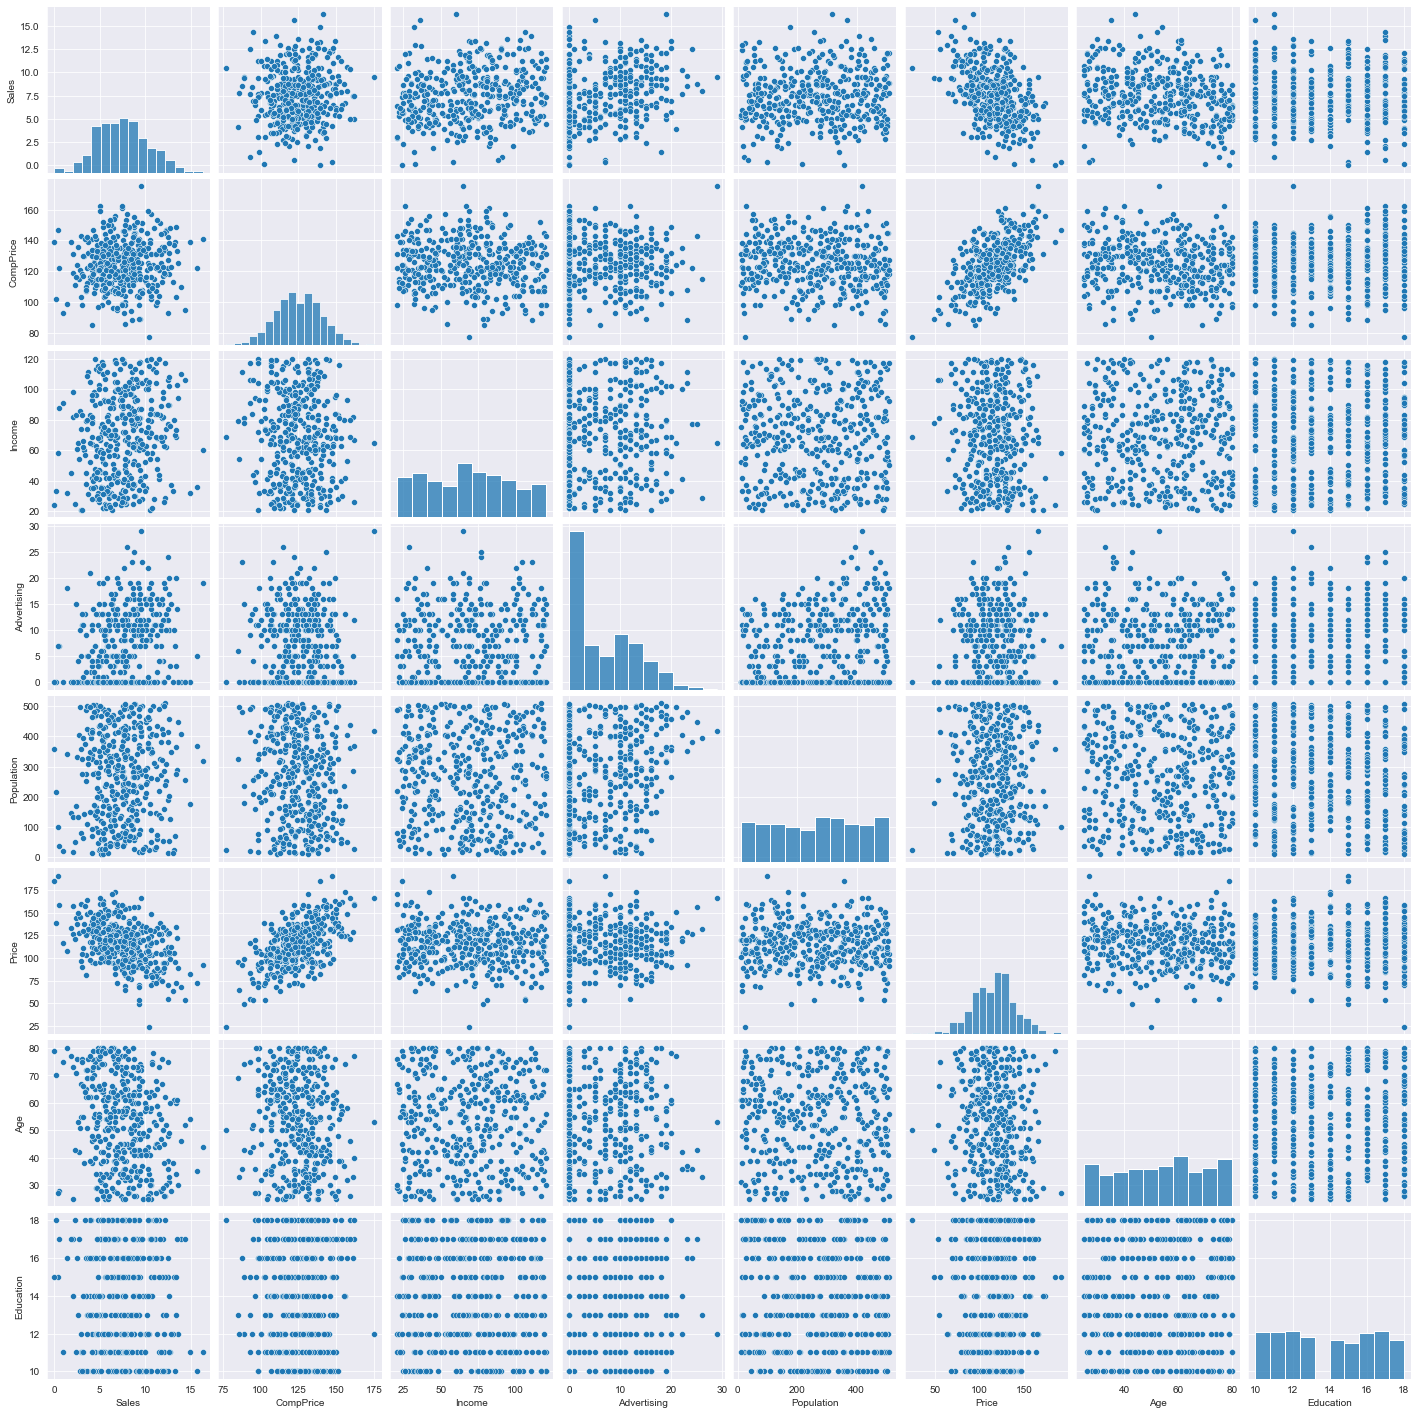

In [15]:
sns.set_style('darkgrid')
sns.pairplot(company_data[numerical_feature])
plt.show()

In [16]:
def boxplot(x_param, y_param):
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x_param, data=company_data,y=y_param, palette = "dark")
    plt.xlabel('\n'+ x_param)
    plt.ylabel(y_param + '\n')
    plt.title("parameter " + x_param + " vs " + y_param + " relation")
    plt.show()

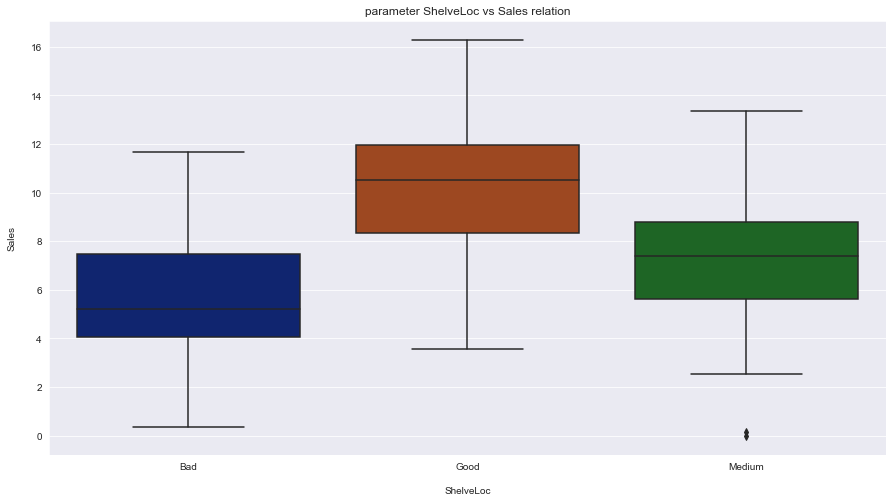

In [17]:
boxplot("ShelveLoc","Sales")


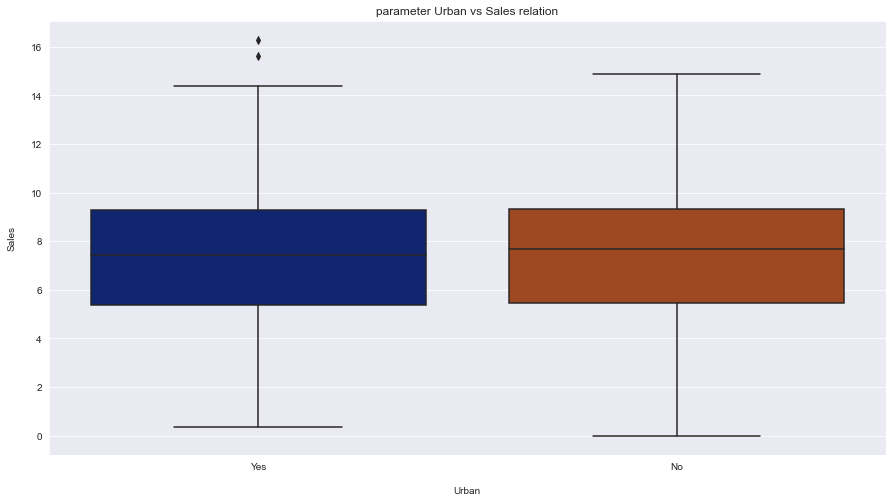

In [18]:
boxplot("Urban","Sales")


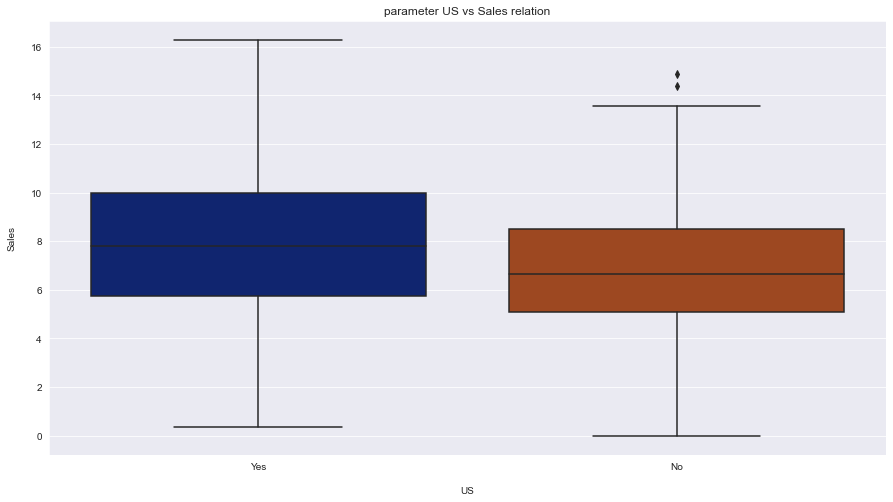

In [19]:
boxplot("US","Sales")


In [20]:
def factorplot(param):
    sns.factorplot(x =param, size = 7, aspect = 2, data = company_data, y= "Sales", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

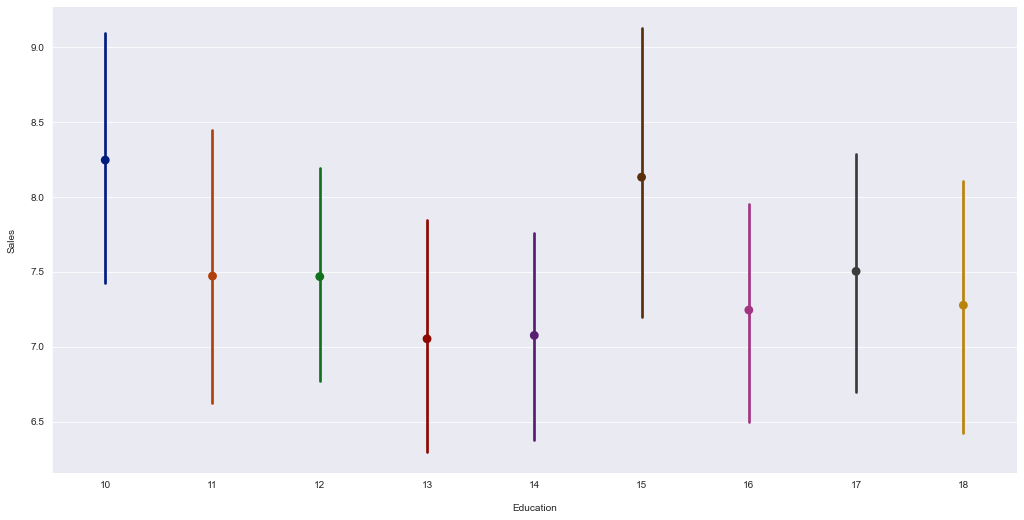

In [21]:
factorplot("Education")


In [22]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(company_data[param], color = "green", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()

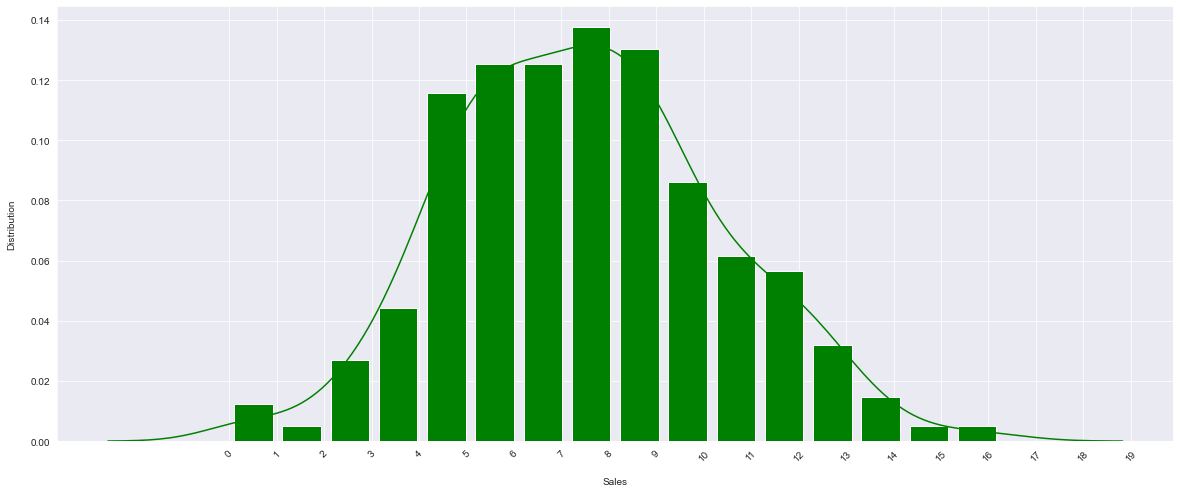

In [23]:
distplot("Sales")


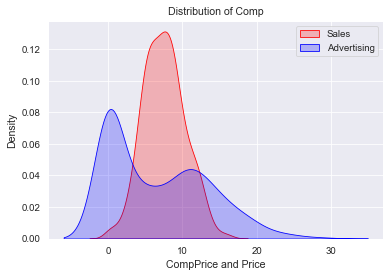

In [24]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Sales,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Advertising,
                ax =ax, color="Blue", shade= True);
ax.legend(["Sales","Advertising"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of Comp');

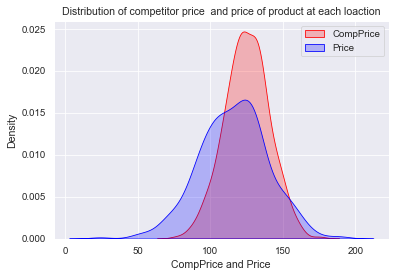

In [25]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.CompPrice,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Price,
                ax =ax, color="Blue", shade= True);
ax.legend(["CompPrice","Price"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of competitor price  and price of product at each loaction');

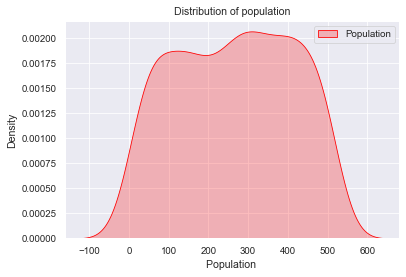

In [26]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Population,
                color="Red", shade = True);
ax.legend(["Population"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of population');

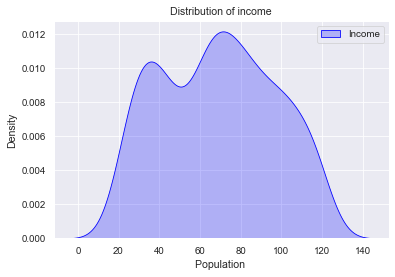

In [27]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Income,
                color="Blue", shade = True);
ax.legend(["Income"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of income');

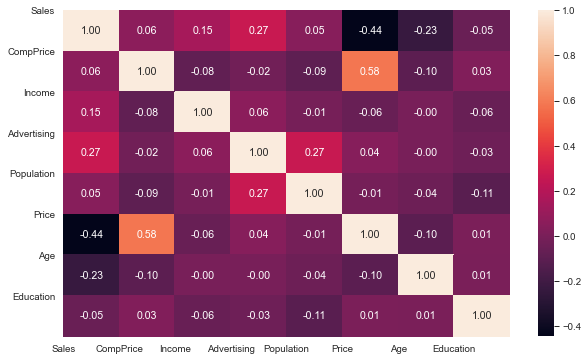

In [28]:
corr = company_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [29]:
#Create a label encoder object
le = LabelEncoder()
data = company_data.copy()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 3:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [30]:
data.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

Text(0.5, 1.0, 'Correlation with Sales \n')

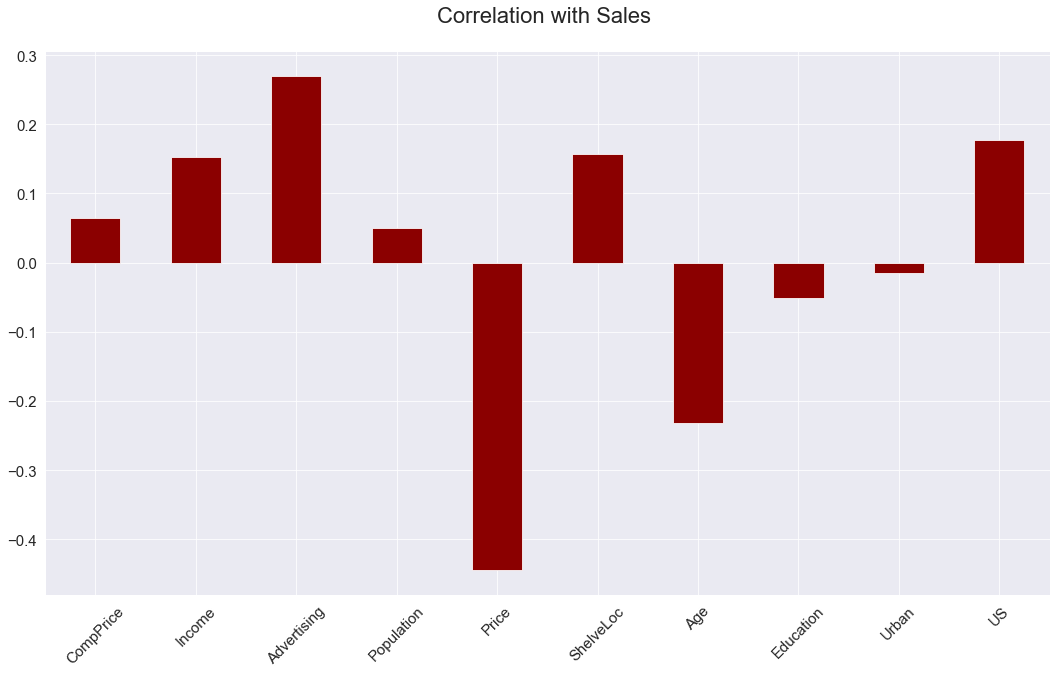

In [31]:
data2 = data.iloc[:,1:]

correlations = data2.corrwith(data.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'darkred',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [32]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0  Medium        138      73           11         276    120          0   42   
1  Medium        111      48           16         260     83          1   65   
2  Medium        113      35           10         269     80          2   59   
3  Medium        117     100            4         466     97          2   55   
4     Low        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [33]:
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Sales'].value_counts(), name="Sales"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sales', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [34]:
# split into input (X) and output (y) variables
X = data.iloc[:, 1:]
# Normalizing the data

y = data.iloc[:,0]

In [35]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression

In [36]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [37]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [38]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])

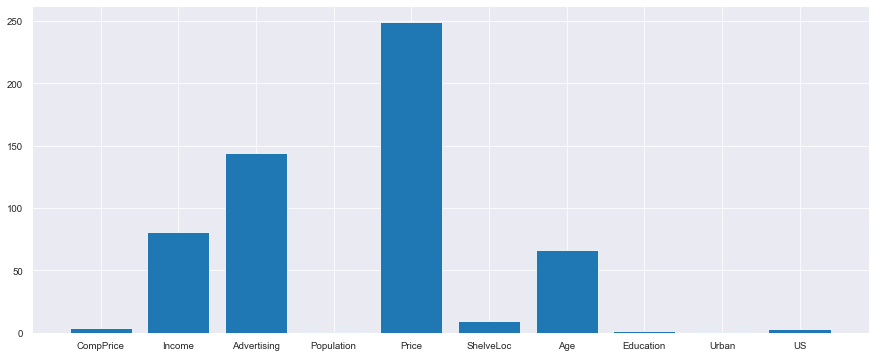

In [39]:
fig, axes = plt.subplots(figsize=(15, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(X.columns.values)
plt.show()

In [40]:
score_df


Score      Feature
0    3.898322    CompPrice
1   80.520134       Income
2  144.508146  Advertising
3    0.152363   Population
4  249.402227        Price
5    9.548468    ShelveLoc
6   66.427476          Age
7    1.306335    Education
8    0.060352        Urban
9    2.861523           US

In [41]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ = norm_func(X)
y_  = le.fit_transform(y)

In [42]:
model_data = X_[['Price', 'Advertising', 'Income', 'Age', 'ShelveLoc']]
model_data.head()

Price  Advertising    Income       Age  ShelveLoc
0  0.574850     0.379310  0.525253  0.309091        0.0
1  0.353293     0.551724  0.272727  0.727273        0.5
2  0.335329     0.344828  0.141414  0.618182        1.0
3  0.437126     0.137931  0.797980  0.545455        1.0
4  0.622754     0.103448  0.434343  0.236364        0.0

In [43]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(model_data, y_, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_, y_, test_size=0.33, random_state=1)

In [44]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (268, 5)
Shape of x_test:  (132, 5)
Shape of y_train:  (268,)
Shape of y_test:  (132,)


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [47]:
loc = np.array(score_array).max()
score_array.index(loc)+1

21

In [48]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.6136363636363636
2 : 0.5303030303030303
3 : 0.6818181818181818
4 : 0.6666666666666666
5 : 0.6287878787878788
6 : 0.6363636363636364
7 : 0.6439393939393939
8 : 0.6590909090909091
9 : 0.6287878787878788
10 : 0.6818181818181818
11 : 0.6439393939393939
12 : 0.6742424242424242
13 : 0.6666666666666666
14 : 0.6893939393939394
15 : 0.6818181818181818
16 : 0.696969696969697
17 : 0.6893939393939394
18 : 0.696969696969697
19 : 0.7045454545454546
20 : 0.7121212121212122
21 : 0.7348484848484849
22 : 0.7272727272727273
23 : 0.7196969696969697
24 : 0.7121212121212122
25 : 0.7272727272727273
26 : 0.7196969696969697
27 : 0.7348484848484849
28 : 0.7196969696969697
29 : 0.7348484848484849
30 : 0.7121212121212122
31 : 0.7045454545454546
32 : 0.7196969696969697
33 : 0.7121212121212122
34 : 0.7121212121212122
35 : 0.7121212121212122
36 : 0.7196969696969697
37 : 0.7045454545454546
38 : 0.7045454545454546
39 : 0.7045454545454546
40 : 0.7121212121212122
41 : 0.7121212121212122
42 : 0.7121212121212122
43 

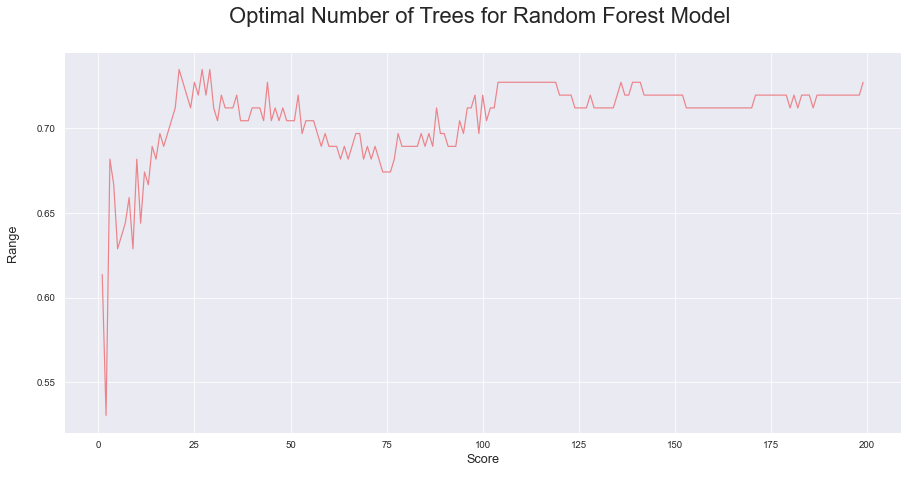

In [49]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [50]:
model_test_results=[]
model_train_results=[]
model_name =[]
model_param = []

In [51]:
rf = RandomForestClassifier(n_estimators = 21, random_state=1) 
rf.fit(X_train,y_train)
#kfold = KFold(n_splits=25, random_state=42)
results = cross_val_score(rf, X_train, y_train, cv=20)
print(results.mean())

0.7282967032967034


In [52]:
model_train_results.append(results.mean())


In [53]:
model_name.append("Base model")
model_param.append(rf.get_params())

In [54]:
print(rf.score(X_test,y_test))


0.7348484848484849


In [55]:
pred1 = rf.predict(X_test)
accuracy_test1 = accuracy_score(y_test2,pred1)

model_test_results.append(accuracy_test1)
accuracy_test1

0.7348484848484849

<AxesSubplot:>

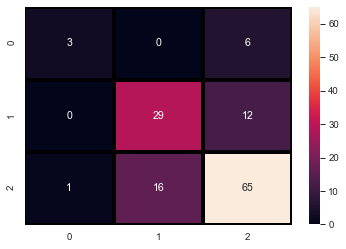

In [56]:
sns.heatmap(confusion_matrix(y_test, pred1),annot=True,fmt = "d",linecolor="k",linewidths=3)


### Hyper aparamet tuning using GridSerch CV

In [57]:
rf.estimator_params


('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [62]:
#Random Forest
rf_test = {"max_depth": [22,24,26],
           #"max_features": [6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[21,50,150],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[24,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test, scoring = 'accuracy', n_jobs = 6, cv = 10)

In [63]:
tuning.fit(X_train,y_train)

rf_best = tuning.best_estimator_

tuning.best_score_

0.7461538461538462

In [64]:
tuning.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 22,
 'max_leaf_nodes': 24,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50}

Accuracy :  0.7272727272727273


<AxesSubplot:>

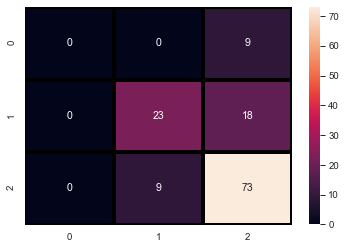

In [66]:
pred2 = rf_best.predict(X_test)
accuracy_test2 = accuracy_score(y_test,pred2)
print("Accuracy : ",accuracy_test2)

sns.heatmap(confusion_matrix(y_test, pred2),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [69]:
model_name.append("GsCV model1")
model_train_results.append(tuning.best_score_)
model_param.append(tuning.best_params_)
model_test_results.append(accuracy_test2)

### model2


In [70]:
#base model
score_array2 = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train2,y_train2)
    score_array2.append(rf_loop.score(X_test2,y_test2))

loc2 = np.array(score_array2).max()
score_array2.index(loc2)+1

7

In [71]:
rf2 = RandomForestClassifier(n_estimators = 8, random_state=1) 
rf2.fit(X_train2,y_train2)
#kfold = KFold(n_splits=25, random_state=42)
results2 = cross_val_score(rf2, X_train2, y_train2)
print(results2.mean())

0.7273934311670159


In [72]:
print(rf2.score(X_test2,y_test2))


0.7272727272727273


Accuracy :  0.7272727272727273


<AxesSubplot:>

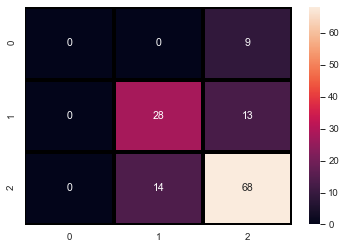

In [73]:
pred3 = rf2.predict(X_test2)
accuracy_test3 = accuracy_score(y_test2,pred3)
print("Accuracy : ",accuracy_test3)

sns.heatmap(confusion_matrix(y_test2, pred3),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [74]:
model_name.append("base model2")
model_train_results.append(results2.mean())
model_param.append(rf.get_params())
model_test_results.append(accuracy_test3)

### GsCV model2


In [75]:
#Random Forest
rf_test2 = {"max_depth": [22,24,26],
           #"max_features": [6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[8,21,50,150],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[24,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning2.fit(X_train2,y_train2)

rf_best2 = tuning2.best_estimator_

tuning2.best_score_

0.7759259259259259

In [76]:
tuning2.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 24,
 'max_leaf_nodes': 28,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

In [77]:
{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 22,
 'max_leaf_nodes': 24,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 22,
 'max_leaf_nodes': 24,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

Accuracy :  0.6742424242424242


<AxesSubplot:>

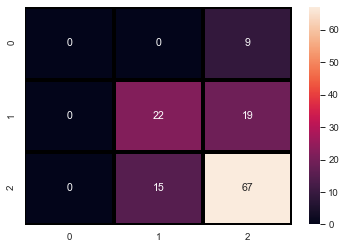

In [78]:
pred4 = tuning2.predict(X_test2)
accuracy_test4 = accuracy_score(y_test2,pred4)
print("Accuracy : ",accuracy_test4)

sns.heatmap(confusion_matrix(y_test2, pred4),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [79]:
model_name.append("GsCV model2")
model_train_results.append(tuning2.best_score_)
model_param.append(tuning2.best_params_)
model_test_results.append(accuracy_test4)

### GsCV model3


In [80]:
#Random Forest
rf_test3 = {"max_depth": [22,24,26],
            "n_estimators" :[8,21,50,150],
           "criterion": ["gini","entropy"]
            }

tuning3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning3.fit(X_train2,y_train2)

rf_best3 = tuning3.best_estimator_

tuning3.best_score_

0.7796296296296296

In [81]:
tuning3.best_params_


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 22,
 'max_leaf_nodes': 28,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

Accuracy :  0.6818181818181818


<AxesSubplot:>

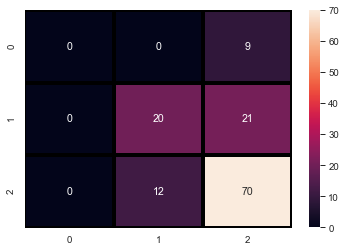

In [82]:
pred5 = tuning3.predict(X_test2)
accuracy_test5 = accuracy_score(y_test2,pred5)
print("Accuracy : ",accuracy_test5)

sns.heatmap(confusion_matrix(y_test2, pred5),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [83]:
model_name.append("GsCV model3")
model_train_results.append(tuning3.best_score_)
model_param.append(tuning3.best_params_)
model_test_results.append(accuracy_test5)

### GsCV model4


In [84]:
#Random Forest
rf_test4 = {"max_depth": [6,8,10,12,14,16,18,20],
           
           "n_estimators" :[6,7,8,21,50,150],
           "criterion": ["gini","entropy"]
              }

tuning4 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning4.fit(X_train2,y_train2)

rf_best4 = tuning4.best_estimator_

tuning4.best_score_

0.7722222222222223

In [85]:
pred6 = rf_best3.predict(X_test2)
accuracy_test6 = accuracy_score(y_test2,pred6)
accuracy_test6

0.6818181818181818

In [86]:
con_test = confusion_matrix(y_test,pred6)
con_test

array([[ 0,  0,  9],
       [ 0, 20, 21],
       [ 0, 12, 70]], dtype=int64)

<AxesSubplot:>

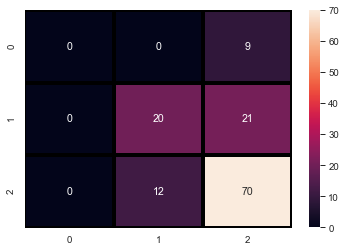

In [87]:
sns.heatmap(confusion_matrix(y_test, pred6),annot=True,fmt = "d",linecolor="k",linewidths=3)


In [88]:
model_name.append("GsCV model4")
model_train_results.append(tuning4.best_score_)
model_param.append(tuning4.best_params_)
model_test_results.append(accuracy_test6)

In [89]:
#Random Forest
rf_ = {"max_depth": [24,26],
           "max_features": [6,8,10],
           "min_samples_split": [3,4],
           "min_samples_leaf": [3,4],
           "bootstrap": [True],
           "n_estimators" :[50,80],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning_ = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_, scoring = 'accuracy', n_jobs = 6, cv = 5)

tuning_.fit(X_train2,np.ravel(y_train2))

rf_best_ = tuning_.best_estimator_

tuning_.best_score_

0.7832983927323551

In [90]:
tuning_.best_score_

0.7832983927323551

In [91]:
pred_ = rf_best_.predict(X_test2)
accuracy_test_ = accuracy_score(y_test2,pred_)
accuracy_test_

0.7424242424242424

<AxesSubplot:>

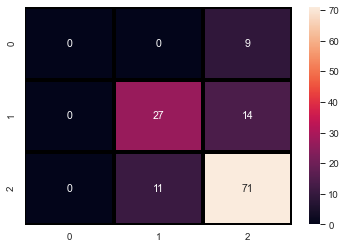

In [92]:
sns.heatmap(confusion_matrix(y_test2, pred_),annot=True,fmt = "d",linecolor="k",linewidths=3)


In [93]:
model_name.append("GsCV model5")
model_train_results.append(tuning_.best_score_)
model_param.append(tuning_.best_params_)
model_test_results.append(accuracy_test_)

In [94]:
#Random Forest
rf_1 = {"max_depth": [8,6,12,24,26],
           "max_features": [4,6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[8,21,50,80],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[6,8,12,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_1, scoring = 'accuracy', n_jobs = 6, cv = 5)

tuning_1.fit(X_train2,np.ravel(y_train2))

rf_best_1 = tuning_1.best_estimator_

tuning_1.best_score_

0.8020964360587002

In [95]:
tuning_1.best_params_


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 26,
 'max_features': 10,
 'max_leaf_nodes': 26,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

In [96]:
pred_1 = rf_best_1.predict(X_test2)
accuracy_test_1 = accuracy_score(y_test2,pred_1)
accuracy_test_1

0.7272727272727273

<AxesSubplot:>

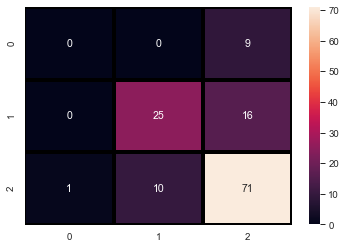

In [97]:
sns.heatmap(confusion_matrix(y_test2, pred_1),annot=True,fmt = "d",linecolor="k",linewidths=3)


In [98]:
model_name.append("GsCV model6")
model_train_results.append(tuning_1.best_score_)
model_param.append(tuning_1.best_params_)
model_test_results.append(accuracy_test_1)

In [99]:
list_of_tuples = list(zip(model_name, model_train_results, model_test_results, model_param))
df = pd.DataFrame(list_of_tuples,columns = ['model name', 'train rrsult', 'test result', 'model parameters'])

In [100]:
df.sort_values(by = "test result",ascending=False)


model name  train rrsult  test result  \
8  GsCV model5      0.783298     0.742424   
0   Base model      0.728297     0.734848   
1  GsCV model1      0.746154     0.727273   
2  GsCV model1      0.746154     0.727273   
3  GsCV model1      0.746154     0.727273   
4  base model2      0.727393     0.727273   
9  GsCV model6      0.802096     0.727273   
6  GsCV model3      0.779630     0.681818   
7  GsCV model4      0.772222     0.681818   
5  GsCV model2      0.775926     0.674242   

                                    model parameters  
8  {'bootstrap': True, 'criterion': 'entropy', 'm...  
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
1  {'bootstrap': True, 'criterion': 'gini', 'max_...  
2  {'bootstrap': True, 'criterion': 'gini', 'max_...  
3  {'bootstrap': True, 'criterion': 'gini', 'max_...  
4  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
9  {'bootstrap': True, 'criterion': 'entropy', 'm...  
6  {'bootstrap': True, 'criterion': 'entropy', 'm...  
7  {'bootstrap': True, 'criterion': 'entropy', 'm...  
5  {'bootstrap': True, 'criterion': 'gini', 'max_...

In [101]:
X_

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.622449  0.525253     0.379310    0.533066  0.574850        0.0   
1     0.346939  0.272727     0.551724    0.501002  0.353293        0.5   
2     0.367347  0.141414     0.344828    0.519038  0.335329        1.0   
3     0.408163  0.797980     0.137931    0.913828  0.437126        1.0   
4     0.653061  0.434343     0.103448    0.661323  0.622754        0.0   
..         ...       ...          ...         ...       ...        ...   
395   0.622449  0.878788     0.586207    0.386774  0.622754        0.5   
396   0.632653  0.020202     0.103448    0.054108  0.574850        1.0   
397   0.867347  0.050505     0.413793    0.717435  0.808383        1.0   
398   0.234694  0.585859     0.241379    0.549098  0.425150        0.0   
399   0.581633  0.161616     0.000000    0.034068  0.574850        0.5   

          Age  Education  Urban   US  
0    0.309091      0.875    1.0  1.0  
1    0.727273      0.000    1.0  1.0  
2    0.618182      0.250    1.0  1.0  
3    0.545455      0.500    1.0  1.0  
4    0.236364      0.375    1.0  0.0  
..        ...        ...    ...  ...  
395  0.145455      0.500    1.0  1.0  
396  0.545455      0.125    0.0  1.0  
397  0.272727      1.000    1.0  1.0  
398  0.454545      0.250    1.0  1.0  
399  0.436364      0.750    1.0  1.0  

[400 rows x 10 columns]

### Visualizing the one decision tree in random forest


In [102]:
from sklearn.tree import export_graphviz 
from six import StringIO
import pydotplus
from IPython.display import Image 

In [103]:
colnames = list(X_.columns)
predictors = colnames[0:10]
target = data["Sales"]
tree1 = rf_best4.estimators_[20]
dot_data = StringIO()

In [104]:
export_graphviz(tree1,out_file = dot_data, 
                feature_names =predictors, 
                class_names = target, filled =True,
                rounded=True,impurity =False,proportion=False,precision =2)

In [105]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [108]:
##Creating pdf file
graph.write_pdf('companyData_RF.pdf')

##Creating png file
graph.write_png('companyData_RF.png')

True

In [107]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

In [109]:
# above code executed as issue in graphiz 

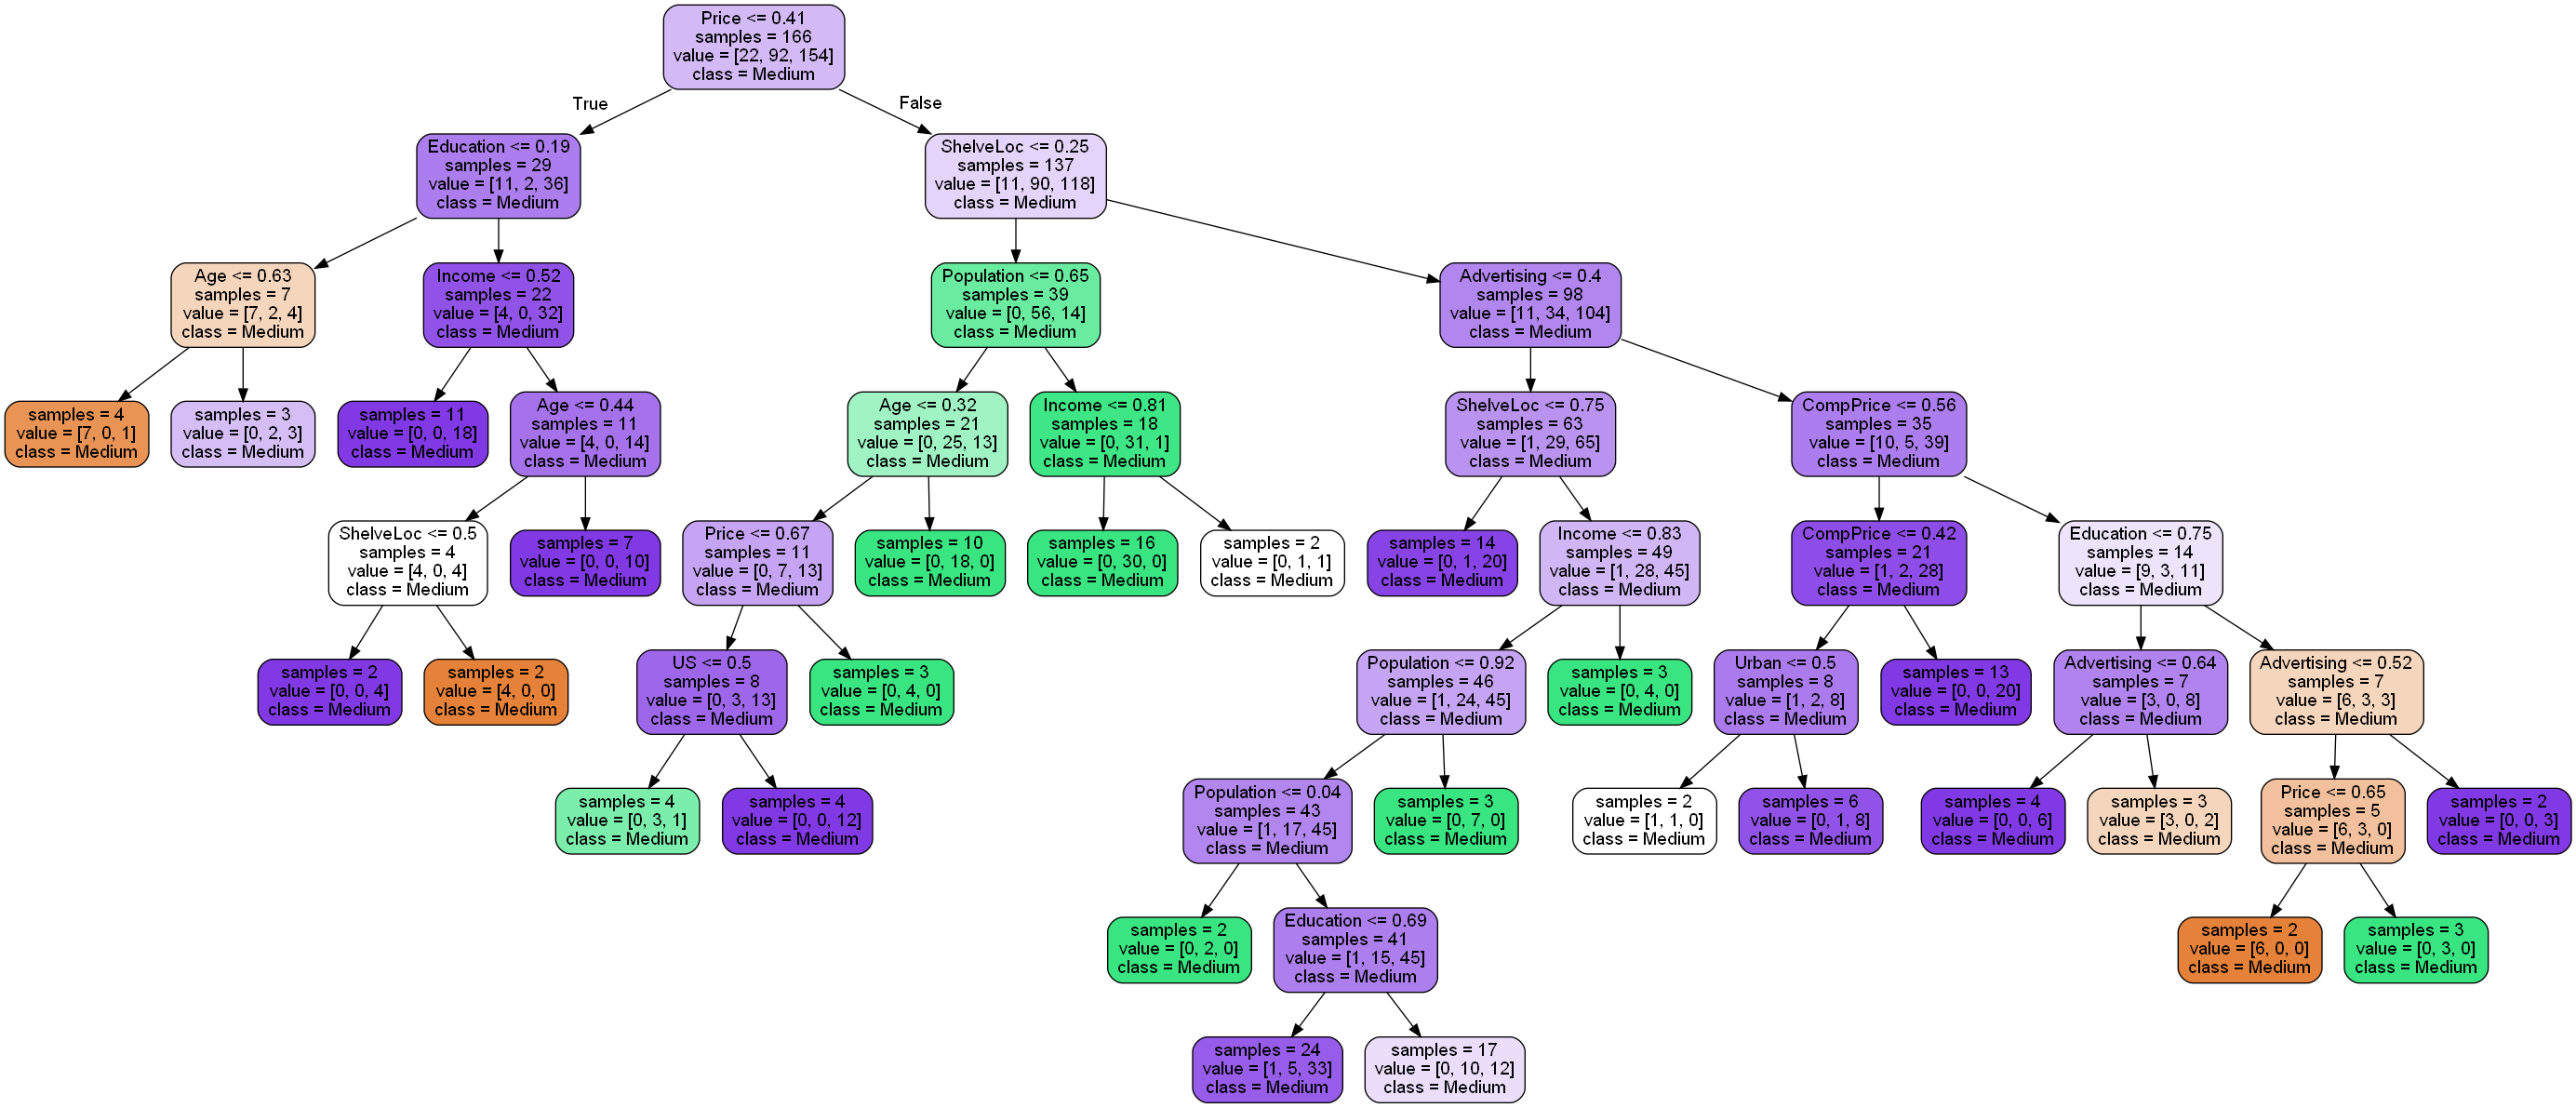

In [110]:
Image(graph.create_png())
